## Importing all the necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

## Getting the tomato dataset

In [2]:
dataset_directory_location = 'tomato_dataset'

## Listing the directories present inside tomato dataset

In [3]:
os.listdir(dataset_directory_location)

['test', 'train']

## Getting the training and testing directory location

In [4]:
train_dataset_location = os.path.join(dataset_directory_location, 'train')
test_dataset_location = os.path.join(dataset_directory_location, 'test')

## Listing all the directories present inside 'train' and 'test' directory respectively

In [5]:
os.listdir(train_dataset_location)

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [6]:
os.listdir(test_dataset_location)

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

## Viewing a 'tomato image with bacterial spot image'

In [7]:
tomato_bacterial_spot_img = os.path.join(train_dataset_location, 'Tomato___Bacterial_spot')

In [8]:
os.listdir(tomato_bacterial_spot_img)[:1]

['00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG']

In [9]:
tomato_bacterial_spot_img_read = imread(os.path.join(tomato_bacterial_spot_img, '00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'))

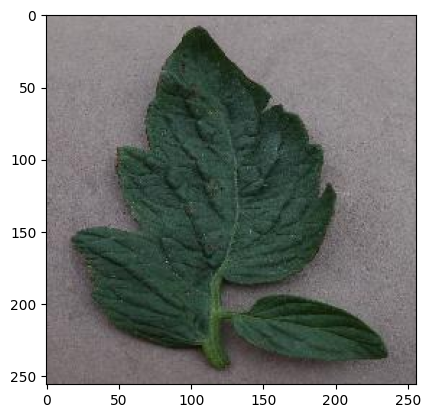

In [10]:
plt.imshow(tomato_bacterial_spot_img_read)

## Getting the shape of the image

In [11]:
tomato_bacterial_spot_img_read.shape

(256, 256, 3)

## Setting the right image shape of the image for our use case

In [12]:
correct_image_shape = (224, 224, 3)

In [13]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest',
                               preprocessing_function=preprocess_input)

In [14]:
train_image_gen = image_gen.flow_from_directory(train_dataset_location, 
                                                target_size=correct_image_shape[:2], 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test_dataset_location, 
                                                target_size=correct_image_shape[:2], 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


## Creating and training the model

In [15]:
model = Sequential()

In [16]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=correct_image_shape)

In [17]:
vgg16_model.trainable = False

In [18]:
model.add(vgg16_model)


model.add(Flatten())


model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 batch_normalization (BatchN  (None, 25088)            100352    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [20]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

In [21]:
model.fit(train_image_gen, validation_data=test_image_gen, epochs=10)

Epoch 1/10
625/625 [==============================] - 173s 256ms/step - loss: 0.9207 - accuracy: 0.7027 - val_loss: 0.6049 - val_accuracy: 0.8110
Epoch 2/10
625/625 [==============================] - 167s 267ms/step - loss: 0.4975 - accuracy: 0.8333 - val_loss: 0.4938 - val_accuracy: 0.8390
Epoch 3/10
625/625 [==============================] - 172s 275ms/step - loss: 0.4084 - accuracy: 0.8666 - val_loss: 0.4467 - val_accuracy: 0.8460
Epoch 4/10
625/625 [==============================] - 167s 267ms/step - loss: 0.3593 - accuracy: 0.8808 - val_loss: 0.4253 - val_accuracy: 0.8690
Epoch 5/10
625/625 [==============================] - 173s 277ms/step - loss: 0.3178 - accuracy: 0.8956 - val_loss: 0.3817 - val_accuracy: 0.8730
Epoch 6/10
625/625 [==============================] - 186s 297ms/step - loss: 0.3054 - accuracy: 0.8985 - val_loss: 0.4724 - val_accuracy: 0.8620
Epoch 7/10
625/625 [==============================] - 188s 300ms/step - loss: 0.2773 - accuracy: 0.9087 - val_loss: 0.4437 -

In [22]:
history_df = pd.DataFrame(model.history.history)

<Axes: >

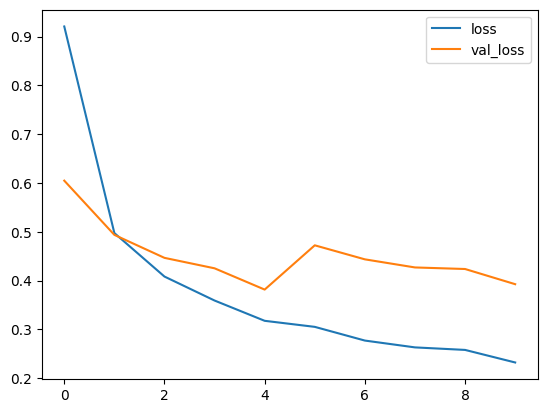

In [23]:
history_df[['loss', 'val_loss']].plot()

<Axes: >

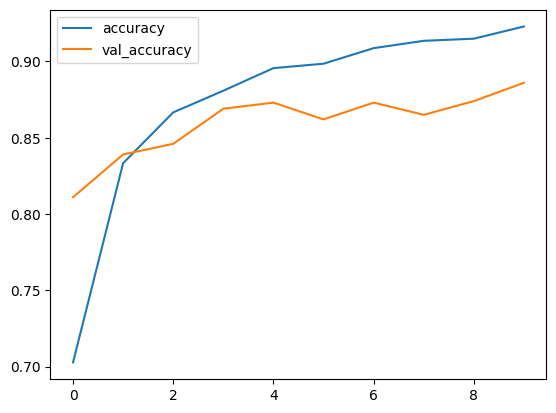

In [24]:
history_df[['accuracy', 'val_accuracy']].plot()

## Calculating the accuracy on training and testing data

In [25]:
model.evaluate(train_image_gen)[1]

625/625 [==============================] - 139s 221ms/step - loss: 0.1422 - accuracy: 0.9559


0.9559000134468079

In [26]:
model.evaluate(test_image_gen)[1]

63/63 [==============================] - 13s 210ms/step - loss: 0.3648 - accuracy: 0.8890


0.8889999985694885

## Making prediction on sample data

In [88]:
sample_img_load = image.load_img('./tomato_dataset/test/Tomato___Septoria_leaf_spot/02b079eb-8c74-42bf-b956-d3aecdb9d4ad___JR_Sept.L.S_8522.JPG', target_size=correct_image_shape)

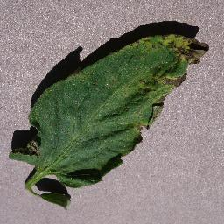

In [89]:
sample_img_load

In [90]:
sample_img_to_arr = image.img_to_array(sample_img_load) 

In [91]:
sample_img_to_arr_preprocess_input = preprocess_input(sample_img_to_arr)

In [92]:
sample_img_to_arr_expand_dim = np.expand_dims(sample_img_to_arr_preprocess_input, 0) 

In [93]:
prediction = model.predict(sample_img_to_arr_expand_dim)[0]

1/1 [==============================] - 0s 32ms/step


In [94]:
pred_result = np.argmax(prediction)

In [95]:
class_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [96]:
pred_final_result = class_names[pred_result]

In [97]:
pred_final_result

'Tomato___Septoria_leaf_spot'

## Saving the model

In [37]:
model.save('VGG16_model.h5')